In [7]:
import numpy as np
import matplotlib.pyplot as plt

alpha, pi = map(float, input("Input the values alpha, pi:").split())
N, T = map(int, input("Input the values N (number of shares to sell) and T (number of periods available):").split())
# alpha, pi, N, T = 1e-03, 0.5, 10000, 20
W = np.zeros((N+1,T))
W_N = np.zeros((N+1,T))
temp = np.arange(0, N+1, 1)
W[:, T-1] = 1 - alpha * (temp**pi)
W[0][T-1] = 0
W_N[:, T-1] = temp

# K is the shares left to trade
# ni is the shares that sells today
for i in range(T-2, -1, -1):
    for K in range(1, N+1):
        ni = np.arange(0, K+1)
        ni = ni[:,np.newaxis]
        coefficient = 1 - alpha * (ni**pi)
        W_next = ni + W[K-ni, i+1]
        ni_array = coefficient * W_next
        W[K][i] = np.max(ni_array)
        W_N[K][i] = np.argmax(ni_array)
        
print("Given that P0 is 1.0, the max revenue is %f" % W[N][0])

Input the values alpha, pi:0.001 0.5
Input the values N (number of shares to sell) and T (number of periods available):10000 20
Given that P0 is 1.0, the max revenue is 9026.745211


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8326.0, 1429.0, 211.0, 29.0, 4.0, 1.0]


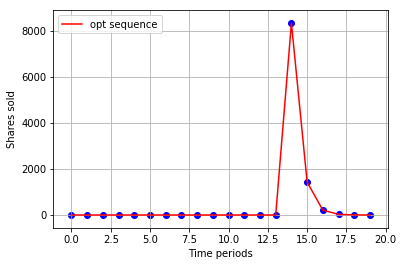

In [8]:
selling_strategy = []
K = int(N)
for t in range(T):
    selling_strategy.append(W_N[K][t])
    K -= W_N[K][t]
    K = int(K)

print(selling_strategy)
    
if K == 0:
    plt.plot(range(T), selling_strategy, 'r-', label='opt sequence')
    plt.scatter(range(T), selling_strategy, c='b')
    plt.xlabel('Time periods')
    plt.ylabel('Shares sold')
    plt.legend()
    plt.grid(True)
    plt.show()